#### Nonlinear Support Vector Machine

##### Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def polynomial_kernel(x1, x2, degree=2):
    """Compute the polynomial kernel between two sets of samples."""
    return (1 + np.dot(x1, x2.T)) ** degree

def svm_nonlinear(traindata, trainclass, C):
    """Train a nonlinear SVM with a polynomial kernel."""
    
    trainclass = np.where(trainclass == 2, -1, 1)
    m = traindata.shape[0]
    
    # Compute the kernel matrix
    K = polynomial_kernel(traindata, traindata)
    
    # matrices for the QP problem
    P = matrix(np.outer(trainclass, trainclass) * K)
    q = matrix(-np.ones(m))
    G = matrix(-np.eye(m))
    h = matrix(np.zeros(m))
    A = matrix(trainclass, (1, m), 'd')
    b = matrix(0.0)
    
    # Solve the QP problem
    sol = solvers.qp(P, q, G, h, A, b)
    
    # Get the Lagrange multipliers 
    alphas = np.ravel(sol['x'])
    
    # Identify support vectors
    sv_idx = alphas > 1e-5
    alphas = alphas[sv_idx]
    svs = traindata[sv_idx]
    sv_classes = trainclass[sv_idx]
    
    # Compute the bias term 
    w0 = np.mean([sv_classes[i] - np.sum(alphas * sv_classes * polynomial_kernel(svs[i], svs)) for i in range(len(svs))])
    
    return svs, sv_classes, alphas, w0



##### Import necessary libraries and load the data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("t030.csv", header = None)
data.head(5)

,0,1,2
0,20.656186,22.474374,1
1,20.191666,21.137179,1
2,21.639415,24.497344,1
3,21.568652,21.258380,1
4,22.164946,24.211911,1


##### Extract class features and labels

In [4]:
traindata = data.iloc[:, :-1].values 
trainclass = data.iloc[:, -1].values

##### Run the SVM function and display outputs

In [5]:
svm_nonlinear(traindata, trainclass, 1)

     pcost       dcost       gap    pres   dres
 0: -4.1027e+00 -9.4010e+00  1e+02  9e+00  2e+00
 1: -7.8948e+00 -5.3081e+00  3e+01  2e+00  6e-01
 2: -1.3581e+00 -9.0367e-01  4e+00  2e-01  6e-02
 3: -6.3680e-01 -3.0872e-01  8e-01  5e-02  1e-02
 4: -1.6458e-01 -1.4203e-01  1e-01  5e-03  1e-03
 5: -1.0919e-01 -1.1376e-01  5e-03  1e-17  1e-11
 6: -1.1117e-01 -1.1122e-01  5e-05  1e-17  7e-12
 7: -1.1119e-01 -1.1119e-01  5e-07  2e-17  7e-12
 8: -1.1119e-01 -1.1119e-01  5e-09  2e-17  9e-12
Optimal solution found.


(array([[20.6703856 , 20.32656844],
        [10.43710943, 14.6661493 ],
        [14.        ,  7.        ],
        [20.        , 17.        ]]),
 array([ 1, -1,  1, -1]),
 array([0.06914002, 0.02369226, 0.0420508 , 0.08749856]),
 -9.109018549904249)

In [6]:
def plot_decision_boundary(traindata, trainclass, svs, sv_classes, alphas, w0):
    """Plot the decision boundary and the support vectors."""
    plt.figure(figsize=(10, 6))
    
    # Plot the training data
    plt.scatter(traindata[trainclass == 1][:, 0], traindata[trainclass == 1][:, 1], color='blue', label='Class 1', s=100)
    plt.scatter(traindata[trainclass == 2][:, 0], traindata[trainclass == 2][:, 1], color='red', label='Class 2', s=100)
    
    # Plot support vectors
    plt.scatter(svs[:, 0], svs[:, 1], facecolors='none', edgecolors='k', s=300, label='Support Vectors')
    
    # Create a grid to plot the decision boundary
    xlim = plt.xlim()
    ylim = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    
    # Evaluate decision function on the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    K_grid = polynomial_kernel(grid, svs)
    decision_scores = np.dot(K_grid, alphas * sv_classes) + w0
    decision_scores = decision_scores.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.contour(xx, yy, decision_scores, levels=[0], linewidths=2, colors='k')
    plt.title('Nonlinear SVM with Polynomial Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

     pcost       dcost       gap    pres   dres
 0: -4.1027e+00 -9.4010e+00  1e+02  9e+00  2e+00
 1: -7.8948e+00 -5.3081e+00  3e+01  2e+00  6e-01
 2: -1.3581e+00 -9.0367e-01  4e+00  2e-01  6e-02
 3: -6.3680e-01 -3.0872e-01  8e-01  5e-02  1e-02
 4: -1.6458e-01 -1.4203e-01  1e-01  5e-03  1e-03
 5: -1.0919e-01 -1.1376e-01  5e-03  1e-17  1e-11
 6: -1.1117e-01 -1.1122e-01  5e-05  1e-17  7e-12
 7: -1.1119e-01 -1.1119e-01  5e-07  2e-17  7e-12
 8: -1.1119e-01 -1.1119e-01  5e-09  2e-17  9e-12
Optimal solution found.


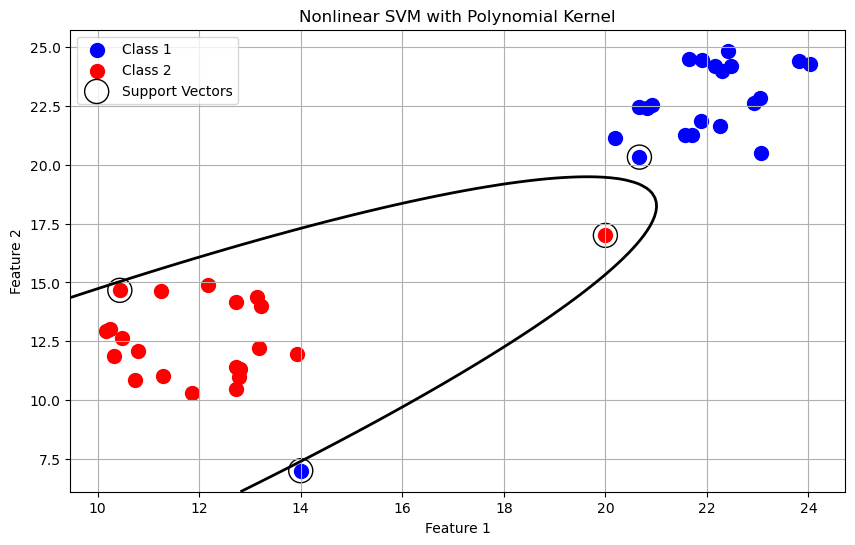

In [7]:
svs, sv_classes, alphas, w0 = svm_nonlinear(traindata, trainclass, C =1)

# Plot the decision boundary and data
plot_decision_boundary(traindata, trainclass, svs, sv_classes, alphas, w0)

#### Lets do train test split to evaluate the model
Few changes were made to the previous implementation, like the parameters of the model, and this only returns a class of test data.

In [8]:
def svm_nonlinear(traindata, trainclass, testdata, C):
    trainclass = np.where(trainclass == 2, -1, 1)  
  
    m, n = traindata.shape

    # Compute the Kernel matrix
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = polynomial_kernel(traindata[i], traindata[j])
    
    # Matrice for the QP problem
    P = matrix(np.outer(trainclass, trainclass) * K)
    q = matrix(-np.ones(m))
    G = matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), C * np.ones(m))))
    A = matrix(trainclass, (1, m), 'd')
    b = matrix(0.0)
    
    # Solve the quadratic programming problem
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(sol['x'])
    
    #  support vectors
    sv_idx = alphas > 1e-5
    alphas = alphas[sv_idx]
    svs = traindata[sv_idx]
    sv_classes = trainclass[sv_idx]
    
    # Calculate weight vector (w) in the kernel space
    w = np.sum(alphas[:, None] * sv_classes[:, None] * svs, axis=0)
    
    # Compute the bias term
    bias_terms = []
    for i in range(len(alphas)):
        bias_terms.append(sv_classes[i] - np.sum(alphas * sv_classes * K[sv_idx][:, i]))
    w0 = np.mean(bias_terms)
    
    # Classify test data
    testclass = []
    for x in testdata:
        decision_value = np.sum(alphas * sv_classes * np.array([polynomial_kernel(x, sv) for sv in svs])) + w0
        testclass.append(1 if decision_value > 0 else -1)
    
    return np.array(testclass)

###### For simplicity lets use sklearn to split the data

In [9]:
from sklearn.model_selection import train_test_split
X = traindata
y = trainclass
Traindata, Testdata, Trainclass, Testclass = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
predicted_testclass = svm_nonlinear(Traindata, Trainclass, Testdata, C =1)

     pcost       dcost       gap    pres   dres
 0: -3.6358e+00 -4.9277e+01  2e+02  2e+00  2e-10
 1: -2.2971e+00 -2.2874e+01  4e+01  2e-01  1e-10
 2: -1.1101e+00 -6.4856e+00  1e+01  6e-02  1e-10
 3: -4.8946e-01 -2.1293e+00  3e+00  2e-02  1e-10
 4: -6.1247e-02 -1.6541e-01  1e-01  3e-04  5e-11
 5: -7.8656e-02 -8.7818e-02  1e-02  2e-05  5e-12
 6: -8.2386e-02 -8.2484e-02  1e-04  2e-07  7e-12
 7: -8.2426e-02 -8.2427e-02  1e-06  2e-09  5e-12
 8: -8.2426e-02 -8.2426e-02  1e-08  2e-11  6e-12
Optimal solution found.


In [11]:
svm_nonlinear(Traindata, Trainclass, Testdata, C =1)

     pcost       dcost       gap    pres   dres
 0: -3.6358e+00 -4.9277e+01  2e+02  2e+00  2e-10
 1: -2.2971e+00 -2.2874e+01  4e+01  2e-01  1e-10
 2: -1.1101e+00 -6.4856e+00  1e+01  6e-02  1e-10
 3: -4.8946e-01 -2.1293e+00  3e+00  2e-02  1e-10
 4: -6.1247e-02 -1.6541e-01  1e-01  3e-04  5e-11
 5: -7.8656e-02 -8.7818e-02  1e-02  2e-05  5e-12
 6: -8.2386e-02 -8.2484e-02  1e-04  2e-07  7e-12
 7: -8.2426e-02 -8.2427e-02  1e-06  2e-09  5e-12
 8: -8.2426e-02 -8.2426e-02  1e-08  2e-11  6e-12
Optimal solution found.


array([-1, -1,  1, -1,  1, -1, -1, -1, -1])

In [12]:
# Convert Testclass to match the recoding format (+1 and -1)
Testclass_recoded = np.where(Testclass == 2, -1, 1)

# Calculate accuracy
accuracy = np.mean(predicted_testclass == Testclass_recoded)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 77.78%


In [13]:
Testclass_recoded

array([-1,  1,  1, -1,  1, -1,  1, -1, -1])